**German Powergrid**

bharambe.vinay3011@gmail.com

roshnijharbade890@gmail.com

anil.kandel3227@gmail.com

dhillonaman777777@gmail.com

In [1]:
import networkx as nx 
import numpy as np 
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go

In [2]:
#importing clean data

v,x,y,type = np.loadtxt('nodes.txt', unpack=True)
p,q,cables,wires = np.loadtxt('weight.txt', unpack=True)
                
#types numbering
#substation=1, plant=2, generator=3, auxillary_t_node=4

In [3]:
#adding nodes
G=nx.Graph()
        
for i in range(0,len(x),1):
    G.add_node(v[i],pos=(x[i],y[i]))
    
pos=nx.get_node_attributes(G,'pos')


In [4]:
#adding links with weights (weight assumptions, cables=1 ,wires=0.2)
weight_edge = []
for i in range(0,len(p),1):
    weight_edge.append(math.ceil(1+0.1*cables[i]+(0.02*wires[i])))
    G.add_edge(p[i],q[i],weight=weight_edge[i])



In [5]:
#Adding nodesizes

degs=[]
nodesize=[]
for i,deg in nx.degree(G):
    degs.append(deg)
    nodesize.append(150*deg)

In [6]:
#Normal color coding using degrees as reference

#degree < 5 ==> blue
#5 <degree <10 ==> orange
#degree > 10 ==> red

color=["#0f03fc"]*511 # Generate a list of size 511 with each value as string red
for i in range(len(x)):
    if degs[i]<5:
        color[i]="#2403fc"
    elif degs[i]>5 and degs[i]<10:
        color[i]="#fc7b03"
    else:
        color[i]="#fc0f03"


In [7]:
#color coding using station type as reference
#substation ==> blue
#plant ==> yellow
#generator ==> green
#auillarynode ==> orange
color=["#0f03fc"]*511
for i in range(0,len(x),1):        
    if (type[i]==1):
        color[i]="#0f03fc"
    elif(type[i]==2):
        color[i]="#fcfc03"
    elif(type[i]==3):
        color[i]="#3aeb34"
    else:
        color[i]="#fc7b03"

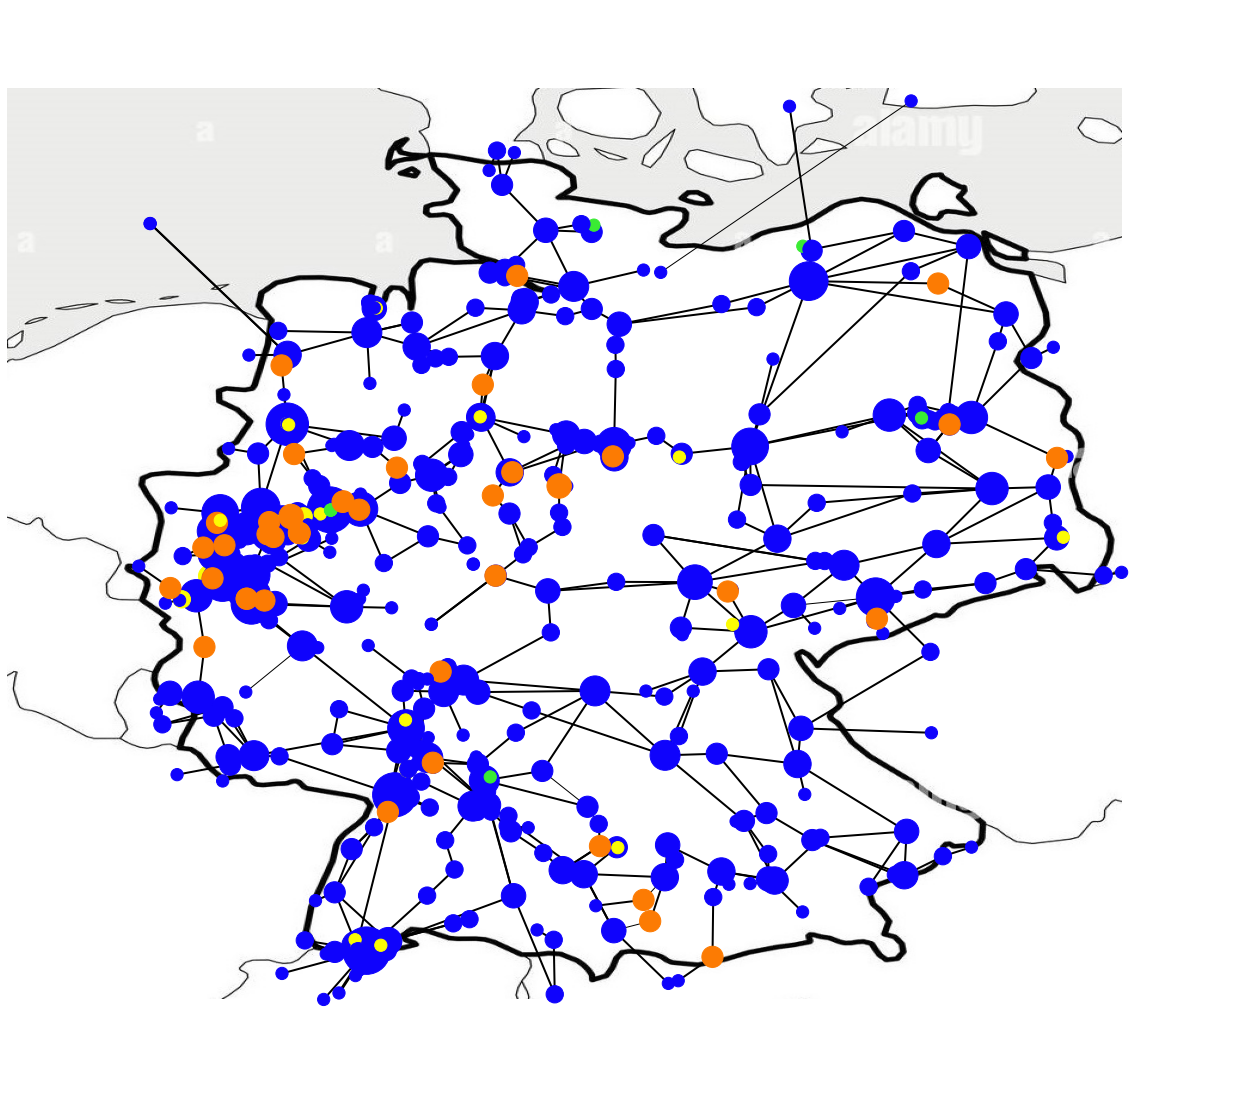

In [8]:
plt.rcParams["figure.figsize"] = (70,20)
img = plt.imread("1.jpg")
fig, ax = plt.subplots()
ax.imshow(img, extent=[4.687555, 15.11496564,47.09422083,55.610345])

nx.draw(G,pos,node_color=color,node_size=nodesize,width=weight_edge)
#nx.draw(G,pos,node_color=color,width=weight_edge,node_size=nodesize)

**Network visualization with Plotly**

In [9]:
#Plotly edges

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=1, color='#000000'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)



In [10]:
#color coding using station type as reference
#substation ==> blue
#plant ==> yellow
#generator ==> green
#auillarynode ==> orange
color=["#0f03fc"]*len(v)
for i in range(0,len(v),1):        
    if (type[i]==1):
        color[i]="#0f03fc"
    elif(type[i]==2):
        color[i]="#fcfc03"
    elif(type[i]==3):
        color[i]="#3aeb34"
    else:
        color[i]="#fc7b03"
        
degs=[]
nodesize=[]
for i,deg in nx.degree(G):
    degs.append(deg)
    nodesize.append(12*math.log10(7*deg))

In [11]:
node_trace = go.Scatter(x=node_x, y=node_y,mode='markers',hoverinfo='text',marker=dict(color=color,size=nodesize,opacity=1),
        line_width=2)

node_text = []

for i in range (0,len(v)):
    node_text.append('Node No:'+str(int(v[i]))+'\n Degree:'+str(int(degs[i])))
    
node_trace.text = node_text


In [14]:
fig = go.Figure(data=[edge_trace, node_trace],layout=go.Layout(title='<br>Network graph made with Python',titlefont_size=16,
                showlegend=False,hovermode='closest',margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(text="Zooming recommended",showarrow=False,xref="paper", yref="paper",x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                Zooming r

In [15]:

# update layout properties
fig.update_layout(autosize=False,height=900,width=1100,hovermode="x",margin=dict(r=50, l=300, b=75, t=125),title=(""),
    images= [dict(source='1.jpg',xref="paper", yref="paper",
                    x=0, y=1,  #position of the upper left corner of the image in subplot 1,1
                    sizex=1, sizey=1, #sizex, sizey are set by trial and error
                    xanchor="left",yanchor="top",sizing="stretch",layer="below")])
fig.update_xaxes(showgrid=False, zeroline=False)
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

